In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [67]:
crypto_df = pd.read_csv("CryptocoinsHistoricalPrices.csv")

In [68]:
crypto_df.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market.Cap', 'coin', 'Delta'],
      dtype='object')

In [69]:
crypto_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market.Cap,coin,Delta
0,1,1/4/18,15270.7,15739.7,14522.2,15599.2,"21,783,200,000","256,250,000,000",BTC,0.021512
1,2,1/3/18,14978.2,15572.8,14844.5,15201.0,"16,871,900,000","251,312,000,000",BTC,0.014875
2,3,1/2/18,13625.0,15444.6,13163.6,14982.1,"16,846,600,000","228,579,000,000",BTC,0.099604
3,4,1/1/18,14112.2,14112.2,13154.7,13657.2,"10,291,200,000","236,725,000,000",BTC,-0.032242
4,5,12/31/17,12897.7,14377.4,12755.6,14156.4,"12,136,300,000","216,326,000,000",BTC,0.097591


In [70]:
#determine total number of altcoins
crypto_df["coin"].nunique()

1356

In [71]:
#filter out top 15 cryptocurrencies to analyze
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:] 

In [72]:
#filter the top 15 dataframe
top15 = top15[["Date", "Close", "coin"]]

In [73]:
#convert the date to datetime so we can use it in a plot 
#top15.set_index(pd.to_datetime(top15["Date"], format = "%m/%d/%y"), inplace = True) 
top15["Date"]=pd.to_datetime(top15["Date"]) #, format = "%m/%d/%y")
top15.head()

,Date,Close,coin
0,2018-01-04,15599.2,BTC
1,2018-01-03,15201.0,BTC
2,2018-01-02,14982.1,BTC
3,2018-01-01,13657.2,BTC
4,2017-12-31,14156.4,BTC


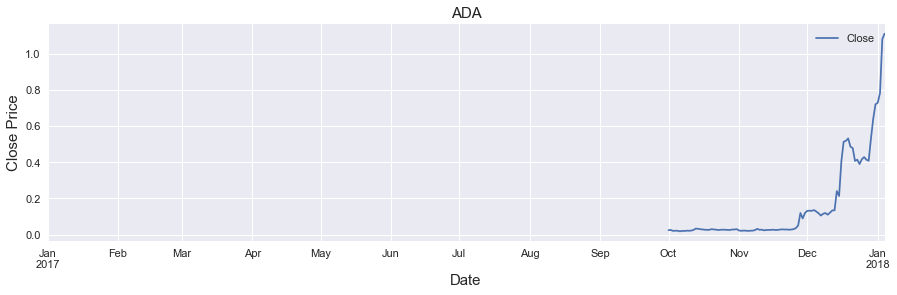

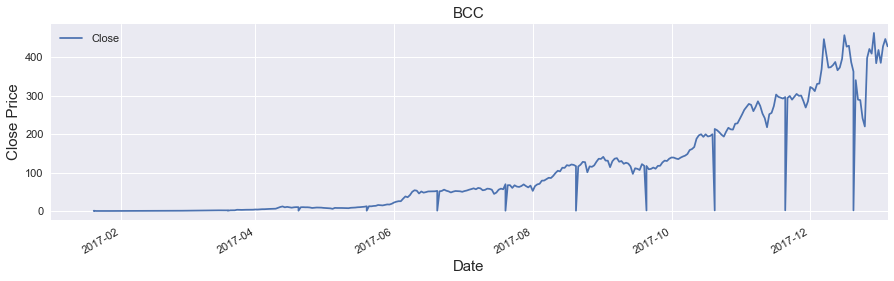

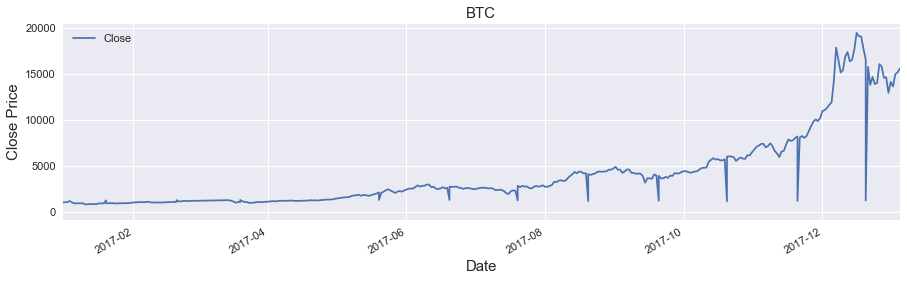

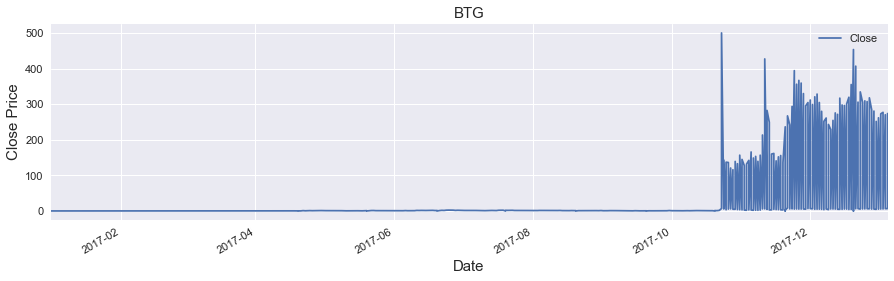

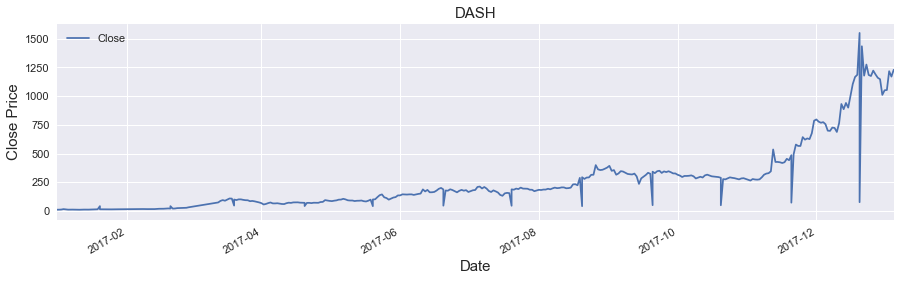

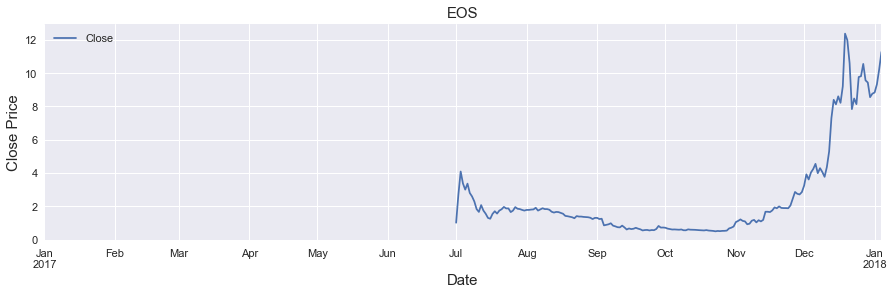

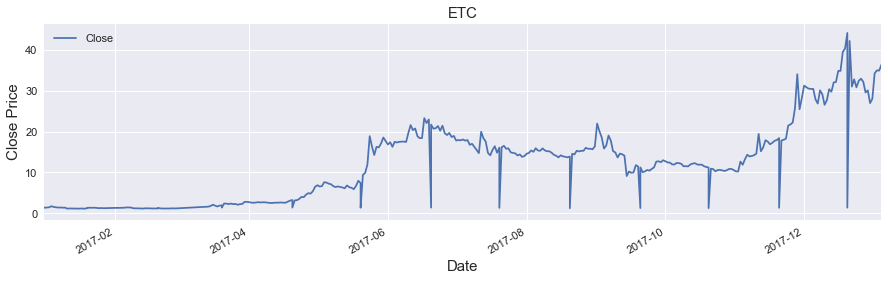

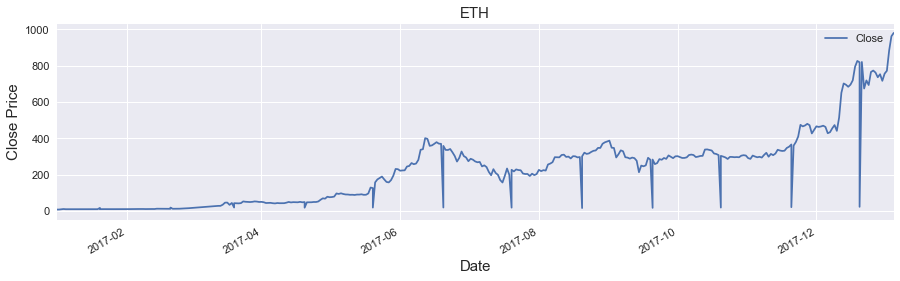

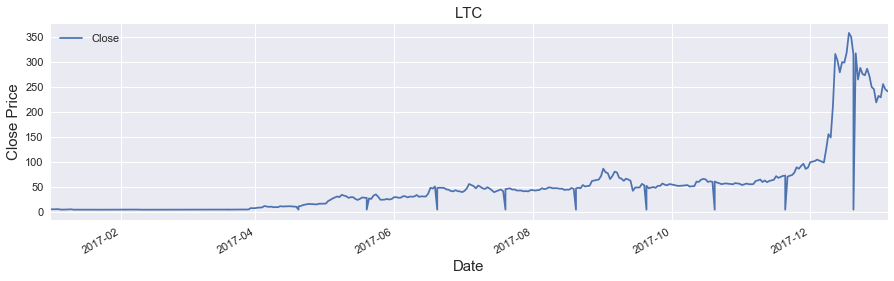

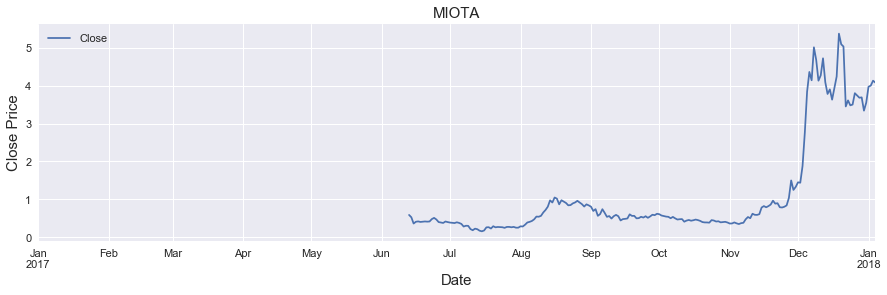

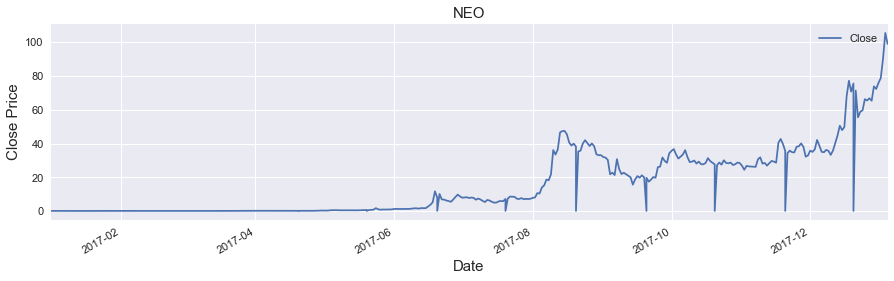

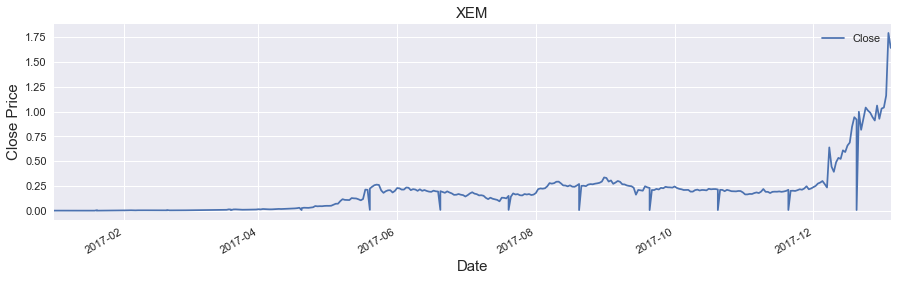

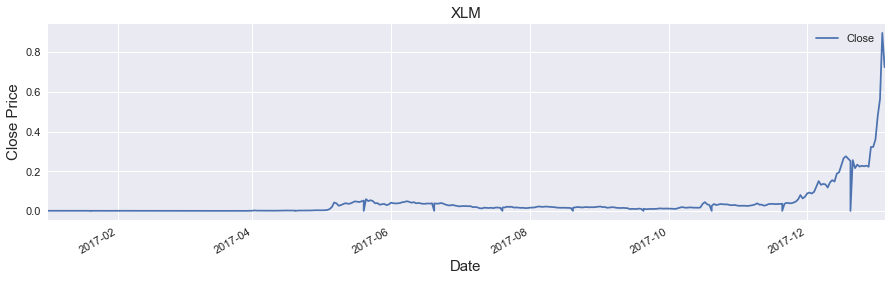

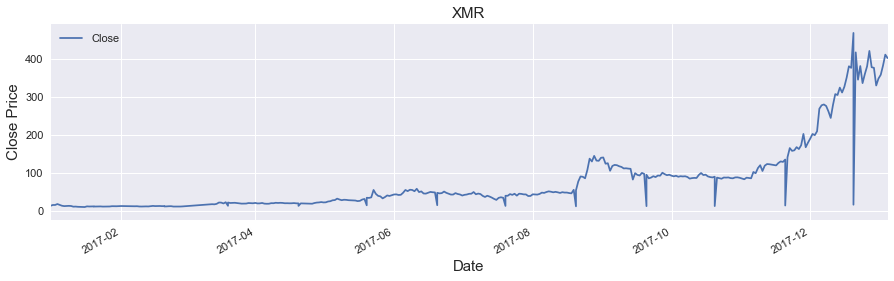

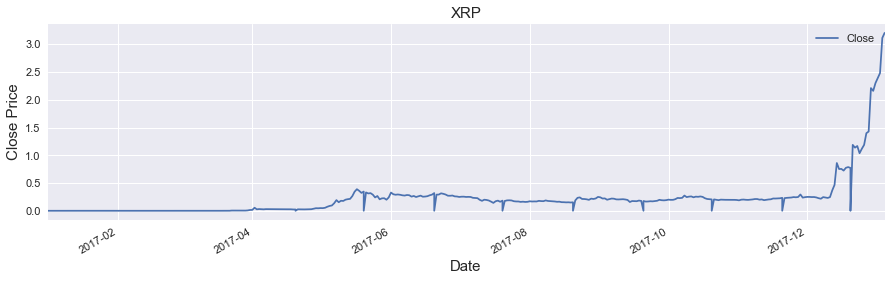

In [74]:
#plot an individual graph for historic closing price data for each of the 15 cryptocurrencies
for name, group in top15.groupby("coin"):
    group.plot(x= "Date", y= "Close", figsize=(15,4), grid = True)
    plt.ylabel("Close Price", fontsize = 15)
    plt.xlabel("Date", fontsize = 15)
    #plt.xlim(top15.iloc[-1,0], top15.iloc[0,0])
    plt.xlim('2017-01-01', top15.iloc[0,0])
    plt.title(name, fontsize = 15)

In [75]:
top5 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")
                      ,:]

top10 = crypto_df.loc[(crypto_df["coin"]=="DASH")|(crypto_df["coin"]=="XEM")|
                      (crypto_df["coin"]=="XMR")|(crypto_df["coin"]=="BTG")|
                      (crypto_df["coin"]=="ETC")
                      ,:]

final_top = crypto_df.loc[(crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:]

In [76]:
top5 = top5[["Date", "Close", "coin"]]
top10 = top10[["Date", "Close", "coin"]]
final_top = final_top[["Date", "Close", "coin"]]

In [83]:
top5.set_index(pd.to_datetime(top5["Date"], format = "%m/%d/%y"), inplace = True) 
top5["Date"]=pd.to_datetime(top5["Date"], format = "%m/%d/%y") 
top5 = top5.reset_index(drop=True)
top10.set_index(pd.to_datetime(top10["Date"], format = "%m/%d/%y"), inplace = True) 
top10["Date"]=pd.to_datetime(top10["Date"], format = "%m/%d/%y") 
top10 = top10.reset_index(drop=True)
final_top.set_index(pd.to_datetime(final_top["Date"], format = "%m/%d/%y"), inplace = True) 
final_top["Date"]=pd.to_datetime(final_top["Date"], format = "%m/%d/%y") 
final_top = final_top.reset_index(drop=True)

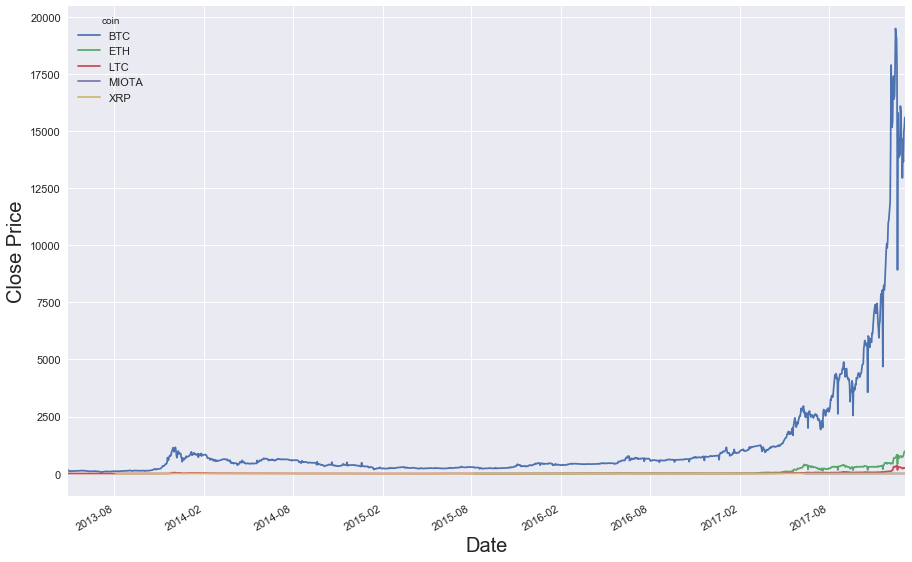

In [84]:
pd.pivot_table(top5, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

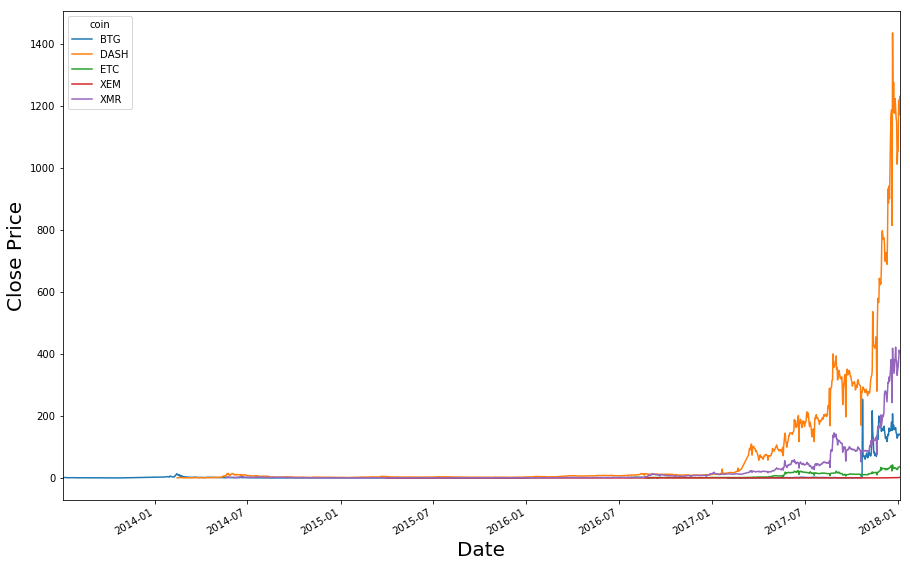

In [14]:
pd.pivot_table(top10, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

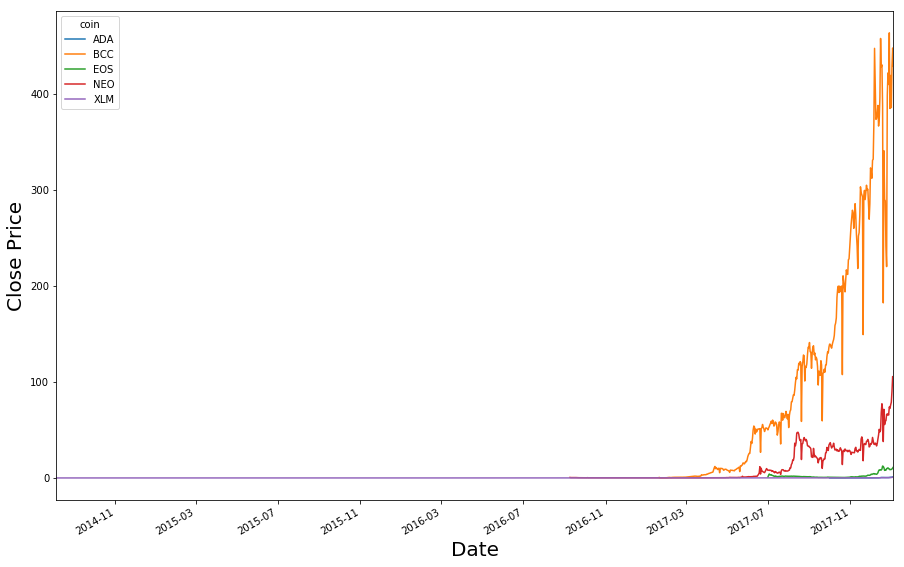

In [15]:
pd.pivot_table(final_top, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

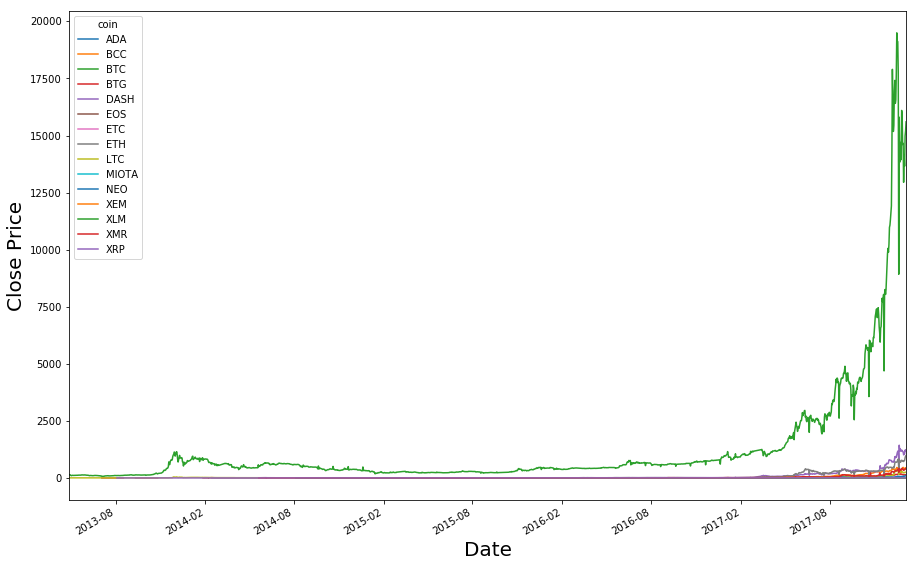

In [16]:
#Plotting all top15 coins together. All coins are trending upwards. 
#All coins experience the majority of their growth in 2017.
pd.pivot_table(top15, values= "Close", columns= "coin", index= "Date").plot(figsize=(15,10))
plt.ylabel("Close Price", fontsize = 20)
plt.xlabel("Date", fontsize = 20)

In [44]:
top15 = crypto_df.loc[(crypto_df["coin"]=="BTC")|(crypto_df["coin"]=="ETH")|
                      (crypto_df["coin"]=="LTC")|(crypto_df["coin"]=="MIOTA")|
                      (crypto_df["coin"]=="XRP")|(crypto_df["coin"]=="DASH")|
                      (crypto_df["coin"]=="XEM")|(crypto_df["coin"]=="XMR")|
                      (crypto_df["coin"]=="BTG")|(crypto_df["coin"]=="ETC")|
                      (crypto_df["coin"]=="ADA")|(crypto_df["coin"]=="EOS")|
                      (crypto_df["coin"]=="XLM")|(crypto_df["coin"]=="NEO")|
                      (crypto_df["coin"]=="BCC")
                      ,:] 

In [45]:
top15 = top15[["Date", "Delta", "coin"]]
top15['Date'] = pd.to_datetime(top15['Date'])
top15 = top15[(top15['Date'] > '2016-12-31') & (top15['Date'] <= '2017-12-31')]  
top15.head()

,Date,Delta,coin
4,2017-12-31,0.097591,BTC
5,2017-12-30,-0.117812,BTC
6,2017-12-29,-0.002695,BTC
7,2017-12-28,-0.079273,BTC
8,2017-12-27,-0.020107,BTC


In [46]:
#st dev and average of daily return (delta)
top15.groupby("coin").agg({np.std, np.mean}) 
top15 = top15.reset_index(drop=True)
top15.head()

,Date,Delta,coin
0,2017-12-31,0.097591,BTC
1,2017-12-30,-0.117812,BTC
2,2017-12-29,-0.002695,BTC
3,2017-12-28,-0.079273,BTC
4,2017-12-27,-0.020107,BTC


In [47]:
top15p = pd.pivot_table(top15, values= "Delta", columns= "coin", index= "Date")

In [48]:
#daily price correlation among coins
top15p = top15p.corr()
top15p = round(top15p, 2)
top15p

coin,ADA,BCC,BTC,BTG,DASH,EOS,ETC,ETH,LTC,MIOTA,NEO,XEM,XLM,XMR,XRP
coin,,,,,,,,,,,,,,,
ADA,1.00,0.07,0.12,-0.04,0.09,0.11,0.49,0.17,0.13,0.32,0.24,0.18,0.39,0.32,0.40
BCC,0.07,1.00,0.44,0.04,0.13,0.14,0.11,0.22,0.15,0.25,0.06,0.05,0.10,0.18,0.02
BTC,0.12,0.44,1.00,0.11,0.31,0.24,0.35,0.35,0.37,0.40,0.22,0.19,0.22,0.41,0.10
BTG,-0.04,0.04,0.11,1.00,0.05,0.01,0.04,0.04,0.04,0.09,0.00,0.06,-0.04,0.07,-0.04
DASH,0.09,0.13,0.31,0.05,1.00,0.20,0.28,0.37,0.29,0.32,0.21,0.23,0.14,0.49,0.00
EOS,0.11,0.14,0.24,0.01,0.20,1.00,0.30,0.38,0.28,0.24,0.23,0.21,0.21,0.25,0.20
ETC,0.49,0.11,0.35,0.04,0.28,0.30,1.00,0.58,0.48,0.48,0.39,0.31,0.23,0.37,0.08
ETH,0.17,0.22,0.35,0.04,0.37,0.38,0.58,1.00,0.35,0.47,0.26,0.26,0.19,0.46,0.11
LTC,0.13,0.15,0.37,0.04,0.29,0.28,0.48,0.35,1.00,0.35,0.27,0.31,0.26,0.36,0.21


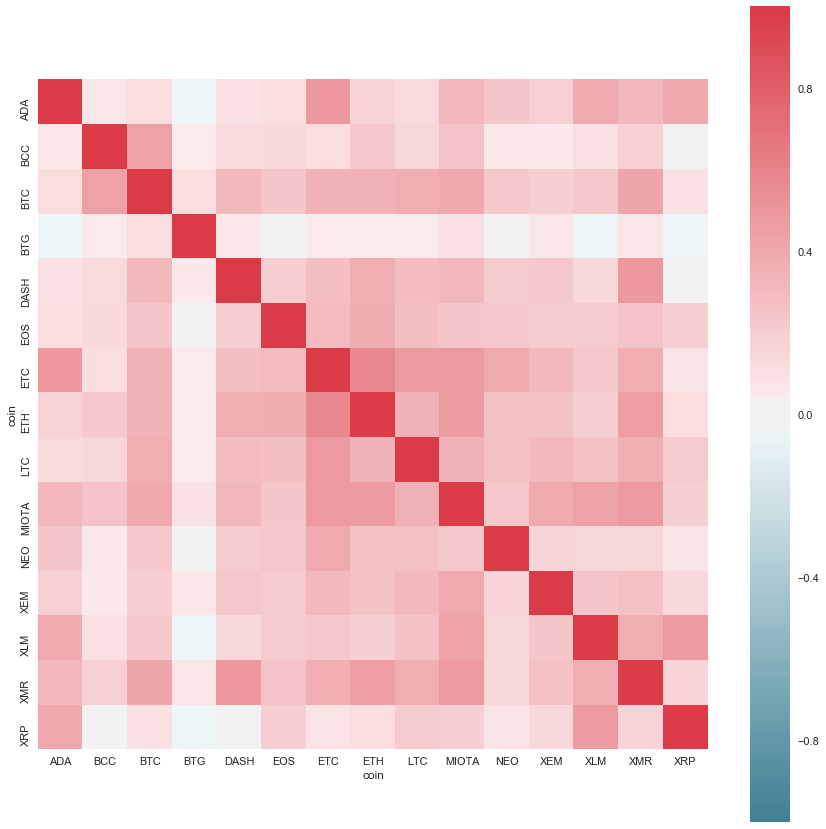

In [65]:
#heat map shows all coins have a positive correlation 
f,ax= plt.subplots(figsize=(15,15))
sns.set(font_scale = 1.1)
sns.heatmap(top15p, mask= np.zeros_like(top15p, dtype= np.bool),cmap= sns.diverging_palette(220,10,as_cmap= True),square = True, ax=ax) 